In [25]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
from pandas import DataFrame

In [26]:
df = read_csv('index.csv', header=0, index_col=0)

In [27]:
X = df.values

In [28]:
size = int(len(X) * 0.7)

In [29]:
train, test = X[0:size], X[size:len(X)]

In [30]:
history = [x for x in train]

In [31]:
predictions = list()

In [32]:
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=0.507799, expected=0.533478
predicted=0.515485, expected=0.550522
predicted=0.525438, expected=0.539685
predicted=0.532836, expected=0.447471
predicted=0.476150, expected=0.434565
predicted=0.469474, expected=0.447340
predicted=0.451119, expected=0.422021
predicted=0.422125, expected=0.476502
predicted=0.464480, expected=0.573707
predicted=0.536785, expected=0.515942
predicted=0.497377, expected=0.464351
predicted=0.488195, expected=0.474170
predicted=0.490082, expected=0.562837
predicted=0.550871, expected=0.526089
predicted=0.501439, expected=0.519521
predicted=0.527207, expected=0.447209
predicted=0.465266, expected=0.404550
predicted=0.442887, expected=0.363139
predicted=0.384348, expected=0.359232
predicted=0.373620, expected=0.403926
predicted=0.395077, expected=0.514234
predicted=0.481539, expected=0.484284
predicted=0.451375, expected=0.447504
predicted=0.454566, expected=0.492166
predicted=0.493504, expected=0.559487
predicted=0.539817, expected=0.531803
predicted=0.

In [33]:
mse = mean_squared_error(test, predictions)

In [34]:
print('Test MSE: %.3f' % mse)

Test MSE: 0.003


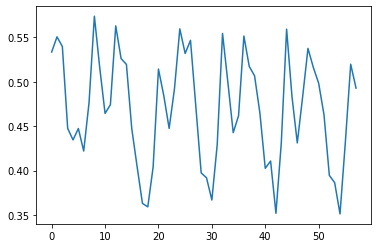

In [35]:
pyplot.plot(test)

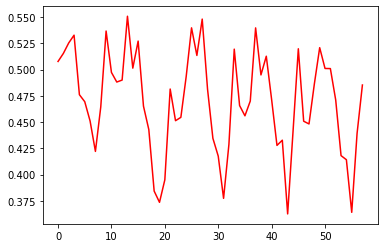

In [36]:
pyplot.plot(predictions, color='red')

In [37]:
rmse = sqrt(mse)

In [38]:
print('Root mean squared error: %.6f' % rmse)

Root mean squared error: 0.055692


In [39]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  189
Model:                 ARIMA(5, 1, 0)   Log Likelihood                 290.627
Method:                       css-mle   S.D. of innovations              0.052
Date:                Mon, 02 Dec 2019   AIC                           -567.254
Time:                        17:00:03   BIC                           -544.561
Sample:                             1   HQIC                          -558.061
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0002      0.002     -0.074      0.941      -0.005       0.004
ar.L1.D.y     -0.1227      0.073     -1.673      0.096      -0.266       0.021
ar.L2.D.y     -0.3453      0.074     -4.672      0.0

In [40]:
residuals = DataFrame(model_fit.resid)

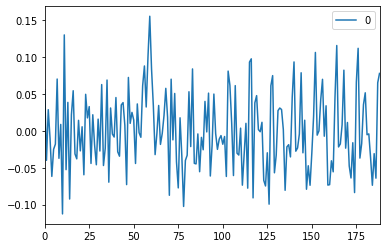

In [41]:
residuals.plot()

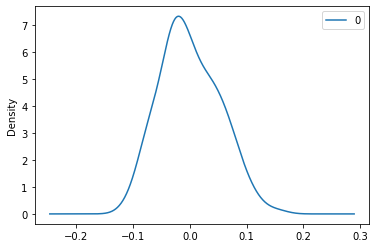

In [45]:
residuals.plot(kind='kde')

In [46]:
print(residuals.describe())

                0
count  189.000000
mean     0.000060
std      0.052123
min     -0.112557
25%     -0.035311
50%     -0.004320
75%      0.036469
max      0.155278
